# Part I - (Data Visualization - Ford Gobike System)
## by (Cyril Ocloo)

## Introduction

Ford GoBike is the Bay area’s new bike share system which provides over thousand of public bikes for use across San Francisco, EastBay and San Jose.  FordGoBike is a personalized bicycle-rental app design that also focuses on the health aspect. 
Ford GoBike, like other bike or scooter share systems, consists of a fleet of specially designed and durable bikes that are locked in docking stations throughout the city of San Francisco, EastBay and San Jose. 
Residents of the city use bike share to commute to work or school, run errands, get to appointments or social engagements and more. Due to its fun, convenience and affordability, tourist normally use it for sightseeing.
The bikes are available for use 24 hours/day.


## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
#Loading dataset
gobike_df=pd.read_csv('201902-fordgobike-tripdata.csv')


In [5]:
#View the first 5 rows
gobike_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
#Show random samples of the dataset
gobike_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
165447,496,2019-02-05 06:59:32.8260,2019-02-05 07:07:49.7900,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,176.0,MacArthur BART Station,37.828410,-122.266315,3267,Subscriber,NaN,NaN,No
6850,851,2019-02-28 09:31:10.7410,2019-02-28 09:45:22.5670,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,11.0,Davis St at Jackson St,37.797280,-122.398436,5972,Subscriber,1988.0,Male,No
16992,759,2019-02-27 07:43:41.4940,2019-02-27 07:56:20.8740,58.0,Market St at 10th St,37.776619,-122.417385,66.0,3rd St at Townsend St,37.778742,-122.392741,6552,Subscriber,1982.0,Male,No
134974,963,2019-02-08 16:07:45.9000,2019-02-08 16:23:49.0190,25.0,Howard St at 2nd St,37.787522,-122.397405,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5253,Subscriber,1983.0,Male,No
22678,599,2019-02-26 07:14:43.6630,2019-02-26 07:24:43.2260,119.0,18th St at Noe St,37.761047,-122.432642,88.0,11th St at Bryant St,37.770030,-122.411726,4757,Subscriber,1981.0,Male,No
21592,359,2019-02-26 09:06:34.7290,2019-02-26 09:12:34.0060,321.0,5th St at Folsom,37.780146,-122.403071,350.0,8th St at Brannan St,37.771431,-122.405787,6328,Subscriber,1989.0,Male,No
3116,407,2019-02-28 17:34:47.1850,2019-02-28 17:41:35.1650,58.0,Market St at 10th St,37.776619,-122.417385,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4806,Subscriber,1999.0,Female,No
10995,922,2019-02-27 19:08:59.5620,2019-02-27 19:24:22.0080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,26.0,1st St at Folsom St,37.787290,-122.394380,4817,Subscriber,1999.0,Male,No
115482,198,2019-02-12 08:43:22.3850,2019-02-12 08:46:40.7400,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,5102,Subscriber,1993.0,Male,Yes
33762,591,2019-02-24 10:41:52.8870,2019-02-24 10:51:44.1010,74.0,Laguna St at Hayes St,37.776435,-122.426244,100.0,Bryant St at 15th St,37.767100,-122.410662,5849,Subscriber,1994.0,Female,No


In [7]:
#Get information on data
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
gobike_df.shape

(183412, 16)

In [5]:
gobike_df.duplicated().sum()

0

**Observation**\
The dataset has 183412 entries and 16 attributes with no duplicated entries

In [9]:
#count the number of null values in each column
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Observaton
- `start_station_id`, `start_station_name`,`end_station_id`, `end_station_name` has 197 null values.
- `member_birth_year`, `member_gender` has 8265 null values.
- `start_time`, `end_time` is an object instead of timestamp datatype.
- `start_station_id`,`bike_id` and `end_station_id` is a float instead of object.
- `member_gender`, `bike_share_for_all_trip` and `user_type` is an object instead of categorical datatype

## Cleaning

As listed in the observation above, there are some quality issues that need to be address through cleaning since the dataset is already tidy in my opinion.

In [10]:
# Save the original data set and save as a new, cleaned version while I clean things up
gobike_df_clean = gobike_df.copy()

### Quality 1

#### Define

Change the datatypes of `start_station_id`,`bike_id` and `end_station_id` columns to object.

#### Code

In [11]:
gobike_df_clean.start_station_id=gobike_df_clean.start_station_id.astype('object')
gobike_df_clean.end_station_id=gobike_df_clean.end_station_id.astype('object')
gobike_df_clean.bike_id=gobike_df_clean.bike_id.astype('object')


#### Test

In [177]:
gobike_df_clean[['start_station_id', 'bike_id', 'end_station_id']].dtypes

start_station_id    object
bike_id             object
end_station_id      object
dtype: object

In [153]:
assert gobike_df_clean.start_station_id.dtypes == 'object'

### Quality 2

#### Define

Change datatypes of `start_time`and  `end_time` columns to timestamp.

#### Code

In [12]:
gobike_df_clean['start_time']=pd.to_datetime(gobike_df_clean['start_time'])
gobike_df_clean['end_time']=pd.to_datetime(gobike_df_clean['end_time'])

#### Test

In [76]:
gobike_df_clean.start_time.info()

<class 'pandas.core.series.Series'>
Int64Index: 175147 entries, 0 to 183411
Series name: start_time
Non-Null Count   Dtype         
--------------   -----         
175147 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB


In [156]:
assert gobike_df_clean.start_time.dtypes == 'datetime64[ns]'

### Quality 3

#### Define

Change `member_gender`, `bike_share_for_all_trip` and `user_type` datatype to categorical.

#### Code

In [13]:
gobike_df_clean.member_gender=gobike_df_clean.member_gender.astype('category')
gobike_df_clean.user_type=gobike_df_clean.user_type.astype('category')
gobike_df_clean.bike_share_for_all_trip=gobike_df_clean.bike_share_for_all_trip.astype('category')


#### Test

In [158]:
assert gobike_df_clean.member_gender.dtypes=='category'
assert gobike_df_clean.user_type.dtypes=='category'
assert gobike_df_clean.bike_share_for_all_trip.dtypes=='category'

In [159]:
gobike_df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
78946,1756,2019-02-18 17:59:09.365,2019-02-18 18:28:26.218,368.0,Myrtle St at Polk St,37.785434,-122.419622,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,6554,Customer,1979.0,Male,No
96778,546,2019-02-15 09:45:11.663,2019-02-15 09:54:17.882,137.0,Jersey St at Castro St,37.750506,-122.433950,112.0,Harrison St at 17th St,37.763847,-122.413004,6340,Subscriber,1978.0,Other,No
18541,525,2019-02-26 18:20:51.509,2019-02-26 18:29:36.987,89.0,Division St at Potrero Ave,37.769218,-122.407646,109.0,17th St at Valencia St,37.763316,-122.421904,6537,Subscriber,1990.0,Male,No
48295,786,2019-02-22 07:52:57.703,2019-02-22 08:06:04.219,160.0,West Oakland BART Station,37.805318,-122.294837,153.0,59th St at Horton St,37.840945,-122.291360,4548,Subscriber,1995.0,Male,No
23032,92,2019-02-25 22:37:28.959,2019-02-25 22:39:01.708,75.0,Market St at Franklin St,37.773793,-122.421239,58.0,Market St at 10th St,37.776619,-122.417385,6234,Subscriber,1984.0,Male,No


### Quality 4

#### Define

Remove NaN in columns`member_birth_year`, `member_gender` has 8265 null values.

#### Code

In [14]:
gobike_df_clean=gobike_df_clean.dropna(subset=['member_birth_year', 'member_gender'])

#### Test

In [75]:
gobike_df_clean.member_birth_year.isnull().sum()

0

### Quality 5

#### Define

Add a column `member_age ` and use `member_birth_year` to calculate the `member_age` in 2019

#### Code

In [15]:
gobike_df_clean['member_age']= 2019- gobike_df_clean['member_birth_year']
gobike_df_clean['member_age']=gobike_df_clean['member_age'].astype('int')
#gobike_df_clean.member_age= gobike_df_clean.member_age.astype('int')

#### Test

In [68]:
gobike_df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
128156,983,2019-02-10 13:47:22.6910,2019-02-10 14:03:46.0010,24.0,Spear St at Folsom St,37.789677,-122.390428,90.0,Townsend St at 7th St,37.771058,-122.402717,4794,Subscriber,1974.0,Female,Yes,45.0
179365,168,2019-02-01 14:12:55.7960,2019-02-01 14:15:44.1900,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4794,Subscriber,1988.0,Male,No,31.0
12004,367,2019-02-27 18:03:28.6540,2019-02-27 18:09:36.0130,198.0,Snow Park,37.807813,-122.264496,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,3417,Subscriber,1954.0,Male,No,65.0
161878,425,2019-02-05 13:27:20.2900,2019-02-05 13:34:26.0400,14.0,Clay St at Battery St,37.795001,-122.399970,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,4625,Subscriber,1982.0,Female,No,37.0
83191,676,2019-02-18 07:44:45.8570,2019-02-18 07:56:02.5430,76.0,McCoppin St at Valencia St,37.771662,-122.422423,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5213,Subscriber,1996.0,Female,No,23.0


In [12]:
gobike_df_clean['member_age'].isnull().sum()

0

In [70]:
gobike_df_clean.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

### Quality 6

#### Define

Create a column for `start_dayofweek`, `start_hour`(day of the week)

#### Code

In [74]:
#gobike_df_clean.info()

In [16]:
# Creating column for start time day of week
gobike_df_clean['start_dayofweek']=gobike_df_clean['start_time'].dt.strftime('%a')
#gobike_df_clean['start_weekday']=gobike_df_clean['start_time'].dt.weekday

In [17]:
# Creating column for start time day of week
gobike_df_clean['start_hour']=gobike_df_clean['start_time'].dt.hour

#### Test

In [79]:
gobike_df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_dayofweek,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,Thu,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0,Thu,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,30.0,Thu,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,31.0,Thu,23
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,27.0,Thu,23
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,23.0,Thu,23


### Quality 7

#### Define

Create a column for duration in minutes.

#### Code

In [18]:
gobike_df_clean['duration_min']=gobike_df_clean['duration_sec']/60


#### Test

In [200]:
gobike_df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_dayofweek,start_hour,duration_min
177421,496,2019-02-01 22:08:37.077,2019-02-01 22:16:54.054,160.0,West Oakland BART Station,37.805318,-122.294837,219.0,Marston Campbell Park,37.809824,-122.280192,2236,Subscriber,1975.0,Female,No,44.0,Fri,22,8.266667
6369,465,2019-02-28 10:24:09.265,2019-02-28 10:31:55.226,58.0,Market St at 10th St,37.776619,-122.417385,109.0,17th St at Valencia St,37.763316,-122.421904,281,Subscriber,1998.0,Male,No,21.0,Thu,10,7.750000
1029,260,2019-02-28 19:54:33.569,2019-02-28 19:58:54.010,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,251.0,California St at University Ave,37.870555,-122.279720,5865,Subscriber,1991.0,Male,No,28.0,Thu,19,4.333333
20844,476,2019-02-26 10:21:36.268,2019-02-26 10:29:33.194,368.0,Myrtle St at Polk St,37.785434,-122.419622,88.0,11th St at Bryant St,37.770030,-122.411726,4831,Subscriber,1993.0,Female,No,26.0,Tue,10,7.933333
86407,2392,2019-02-17 12:21:13.743,2019-02-17 13:01:05.931,58.0,Market St at 10th St,37.776619,-122.417385,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,5969,Subscriber,2000.0,Male,No,19.0,Sun,12,39.866667


Save clean dataset to csv file `gobike_master`

In [64]:
gobike_df_clean.to_csv('gobike_master.csv', index= False)

### What is the structure of your dataset?

> The FordGobike dataset which was collected efficiently and effectively and provides relevant features which is pretty easy to understand.
The dataset which contains approximately 183400 bike riders infomation uses data collected in different location in the San Francisco Bay area of California in the month February 2019.\\

 The following important features were provided in the dataset to help with visualization and draw meaningful conclusion:
- Trip duration (seconds)
- Start Date and time
- End Date and time
- User type (Subscriber/Customer)
- Members birth year
- Member gender
- Bike id
- bike share for all trip

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the dataset are;

- The trip duration in seconds of the rider - This may help to determine if the Gobikes are in high demand or low demand, hence make decision whether of not to supply more bikes.
- User type bike trips - Whether a biker is a subscriber or customer will help determine if they are more likely to ride frequently. This is to help make a business decision of getting more riders to subscribe or not 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?



> The following features in the dataset may help to support my investigation into the bikers trip duration and bike share for all trip.

- start_time- Day of week and hours are extracted for further investigation.
- member_birth_year - member age is derived and investigated to see the relationship between member age and bike durations. The age distribution of bikers gives an insight on which age group should be targetes in marketing campaigns.
- member_gender - gender is investigated to see the relationship between gender and bike durations.
- user_type - Investigate the relationship between user type(subscriber or customer) and bike share for all trips





## Univariate Exploration

> In this section, distributions of individual variables will be investigate. Unusual points or outliers will be cleaned up to prepare for relationships between variables.

 The project will contain at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.

This exploration framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Duration Minutes Visualization

**What type distribution is the trip duration? Normal or Uniform?** \
**What is the average trip duration?**

In [19]:
gobike_df_clean.duration_min.describe()

count    175147.000000
mean         11.736864
std          27.360139
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [25]:
# Define function for plot labels and title to avoid repetition
def x_y_t(xL,yL,title):
    plt.title(title,y=1.05, fontsize=12, fontweight='bold')
    plt.xlabel(xL)
    plt.ylabel(yL)
base_color=sb.color_palette()[2]

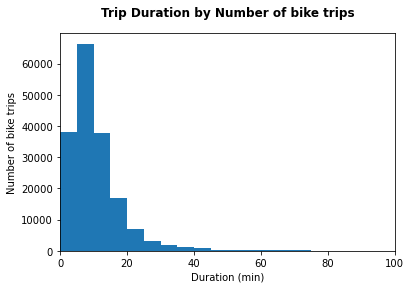

In [26]:
bins=np.arange(0,gobike_df_clean['duration_min'].max()+5,5)

plt.hist(data=gobike_df_clean, x='duration_min',bins=bins);
plt.xlim(0, 100)
x_y_t('Duration (min)',"Number of bike trips",'Ford GoBike System Trip Duration in Minutes')

#plt.xticks(rotation=90);

**Observation**\
From observation, using the above bins as scale, it looks like the feature `duration_mins` is not normally distributed. Therefore, I will use a log scale to see if it give a clear and easy interpretation.

In [30]:
# Transform the describe() to a scale of log10
np.log10(gobike_df_clean.duration_min.describe())

count    5.243403
mean     1.069552
std      1.437118
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

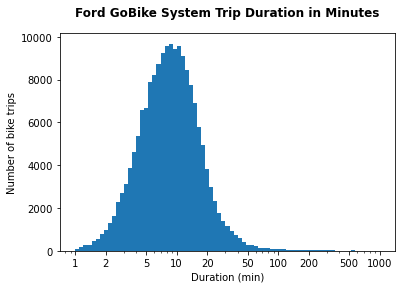

In [27]:
#Axis transformation

#Set log binsize to 0.03
bins= 10**np.arange(0,3+0.04,0.04)
plt.hist(data=gobike_df_clean,x='duration_min', bins=bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
x_y_t('Duration (min)',"Number of bike trips",'Ford GoBike System Trip Duration in Minutes')

    

**Obeservation**
After using a log scale transformation, the above distribution looks more like a normal distribution. The mean, mode and median is approximately 10 minutes with 64% of number of bike trip within 1 standard deviation of the mean. 
However, the right tail is longer so I will drop duration minutes greater than 100 to get rid of the long tail.

In [32]:
# Leave record with duration_min < 100 min
gobike_df_clean = gobike_df_clean[gobike_df_clean['duration_min'] <= 100]
gobike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174442 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174442 non-null  int64         
 1   start_time               174442 non-null  datetime64[ns]
 2   end_time                 174442 non-null  datetime64[ns]
 3   start_station_id         174249 non-null  object        
 4   start_station_name       174249 non-null  object        
 5   start_station_latitude   174442 non-null  float64       
 6   start_station_longitude  174442 non-null  float64       
 7   end_station_id           174249 non-null  object        
 8   end_station_name         174249 non-null  object        
 9   end_station_latitude     174442 non-null  float64       
 10  end_station_longitude    174442 non-null  float64       
 11  bike_id                  174442 non-null  object        
 12  user_type       

### Gender Visualization

**Which gender rides the Gobikes the most?**

In [34]:
gender_counts=gobike_df_clean.member_gender.value_counts()
gender_counts

Male      130189
Female     40643
Other       3610
Name: member_gender, dtype: int64

Text(0.5, 1.0, 'Proportion of Gender Usage')

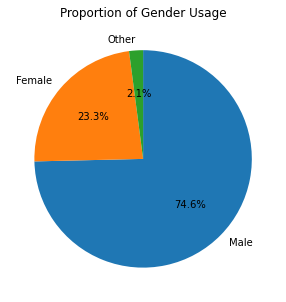

In [93]:
#Bar Plot of the gender
plt.figure(figsize = [10, 5])
plt.pie(gender_counts,labels = gender_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of Gender Usage')

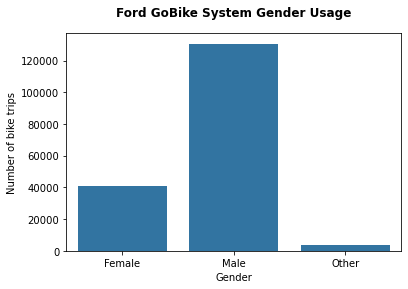

In [28]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
#Bar Plot of the gender
sb.countplot(data=gobike_df_clean, x='member_gender',color=base_color)
x_y_t('Gender',"Number of bike trips",'Ford GoBike System Gender Usage')

**Observation**\
About 74% of total bikers are male, and 23% are female. Other genders constitute about 2% of the total bikers.

### Age Visualization
**Which age rides the Gobikes the most?**

Use box plot to check for outliers

In [37]:
gobike_df_clean['member_age'].describe()

count    174442.000000
mean         34.188791
std          10.115860
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

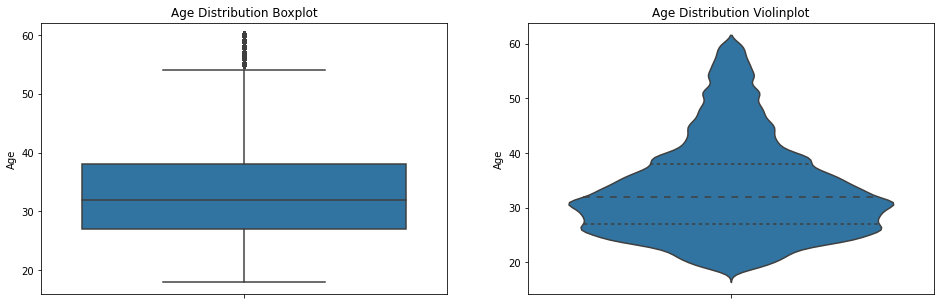

In [80]:
plt.figure(figsize = [16, 5])
#Box plot of age
plt.subplot(1, 2, 1)
sb.boxplot(data=gobike_df_clean, y='member_age')

plt.title('Age Distribution Boxplot')
plt.ylabel("Age");
#Violin plot of age
plt.subplot(1, 2, 2)
sb.violinplot(data=gobike_df_clean, y='member_age',inner='quartile')
plt.title('Age Distribution Violinplot')
plt.ylabel("Age");

**Observation**\
There some few outliers that needs to be removed. I will go ahead and drop all ages above 60

In [30]:
gobike_df_clean=gobike_df_clean[gobike_df_clean['member_age'] <= 60]

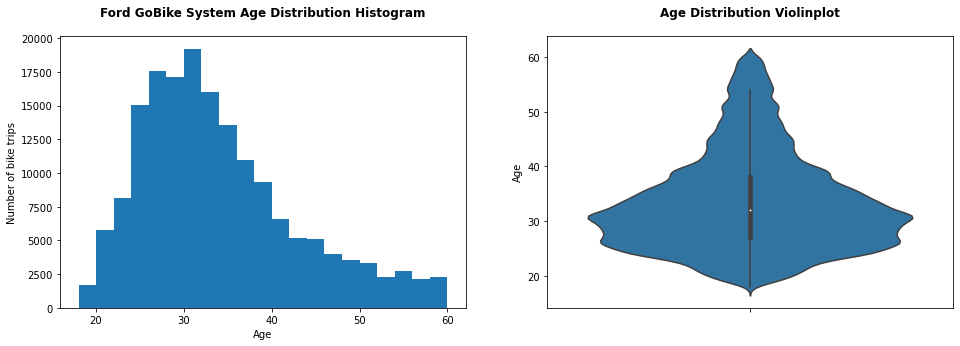

In [31]:
plt.figure(figsize = [16, 5])
#Hist plot of age
plt.subplot(1, 2, 1)
bins = np.arange(18, gobike_df_clean['member_age'].max()+2, 2)
plt.hist(data = gobike_df_clean, x = 'member_age', bins = bins);
x_y_t('Age',"Number of bike trips",'Ford GoBike System Age Distribution Histogram')

#Violin plot of age
plt.subplot(1, 2, 2)
sb.violinplot(data=gobike_df_clean, y='member_age')
plt.title('Age Distribution Violinplot',y=1.05, fontsize=12, fontweight='bold')

plt.ylabel("Age");

**Observation**\
As we can see from the figure above, most bike riders happen to be around the age of 30 with very few bikers above the age 45.

### Start Hour Visualization

**What time do users ride the Gobikes the most?**

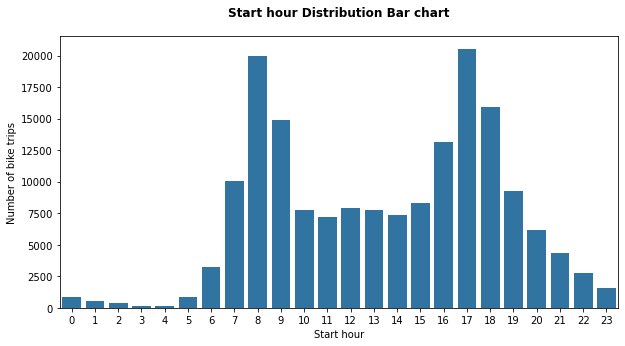

In [88]:
plt.figure(figsize = [10, 5])
sb.countplot(data=gobike_df_clean, x='start_hour',color=base_color)
plt.title('Start hour Distribution Bar chart',y=1.05, fontsize=12, fontweight='bold')
plt.xlabel("Start hour");
plt.ylabel("Number of bike trips");

**Observation**\
Most bikers patronize the Ford Gobikes around 8 AM and 5 PM. 

### Start Day of Week Visualization
**How many trips occur in a week?

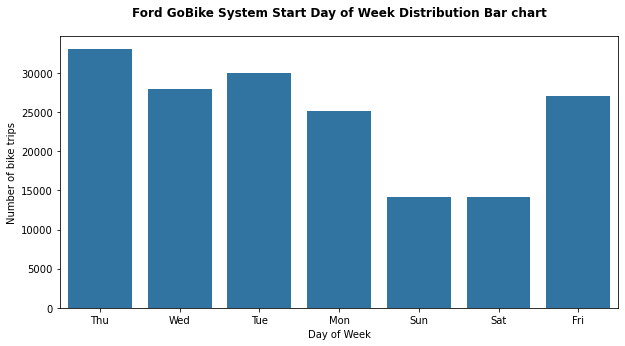

In [32]:
plt.figure(figsize = [10, 5])
sb.countplot(data=gobike_df_clean, x='start_dayofweek',color=base_color)
x_y_t('Day of Week',"Number of bike trips",'Ford GoBike System Start Day of Week Distribution Bar chart')


**Observation**\
Thursday records the most bike riders with Saturday and Sunday the lowest.

### User type Visualization
**Which user type takes more trips?**

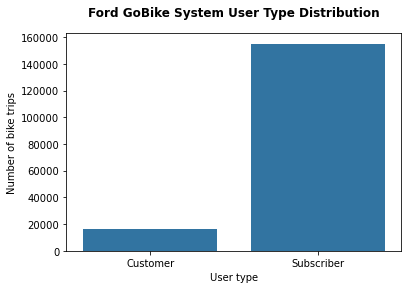

In [33]:
sb.countplot(data=gobike_df_clean, x='user_type',color=base_color)
x_y_t('User type',"Number of bike trips",'Ford GoBike System User Type Distribution')


In [34]:
user_type_counts=gobike_df_clean.user_type.value_counts()
user_type_counts

Subscriber    155180
Customer       16437
Name: user_type, dtype: int64

Text(0.5, 1.05, 'Proportion of User type')

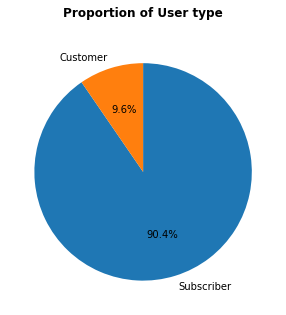

In [35]:
plt.figure(figsize = [10, 5])
plt.pie(user_type_counts,labels = user_type_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('Proportion of User type',y=1.05, fontsize=12, fontweight='bold')


**Observation**\
There are way more subscriber than Customer. About 90% of users are subscribers with monthly subscription.

### Bike share trip for all Visualization
**How many bike share for all trips are taken?**

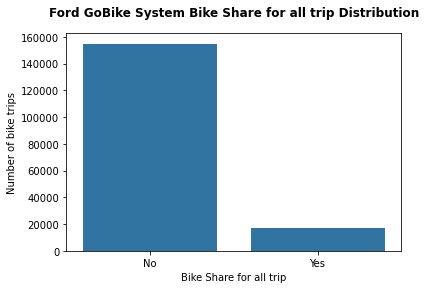

In [36]:
sb.countplot(data=gobike_df_clean, x='bike_share_for_all_trip',color=base_color)
x_y_t('Bike Share for all trip',"Number of bike trips",'Ford GoBike System Bike Share for all trip Distribution')

**Observation**\
Most riders do not user the bike share for all thier trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> During my visualization, I used the box plot to check for outlier in the member age attribute and I found out there were some unusual member age above the age of 60 which had to be dropped.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Also after using a log scale transformation to plot the duration in minutes, the distribution looks more like a normal distribution. However, the right tail is longer so I will drop duration minutes greater than 100 to get rid of the long tail.

## Bivariate Exploration

> In this section, relationships between pairs of variables in the
dataset will be investigate.

### Subscriber and Customer usage by Age
**Which user type by age takes more bike trips?**

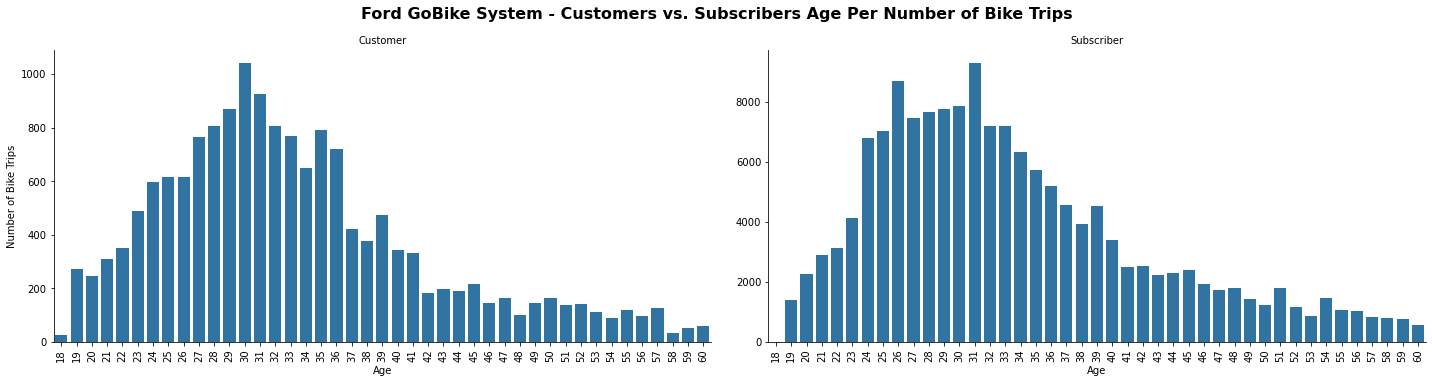

In [99]:
# Customer Usage by Duration vs. Subscriber Usage by Age

graph = sb.catplot(data=gobike_df_clean, x = 'member_age', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Age Per Number of Bike Trips', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=90);

<AxesSubplot:xlabel='user_type', ylabel='member_age'>

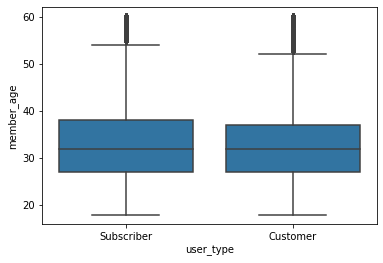

In [103]:
#Box plot
sb.boxplot(data=gobike_df_clean, x='user_type', y='member_age', color=base_color)

**Observation**\
Subscribers of age 31 records the highest number of bike trips whereas customers of age 30 records the highes number of bike trips.

### Subscriber and Customer usage by day of the week
**Which user type takes more trips in a week?

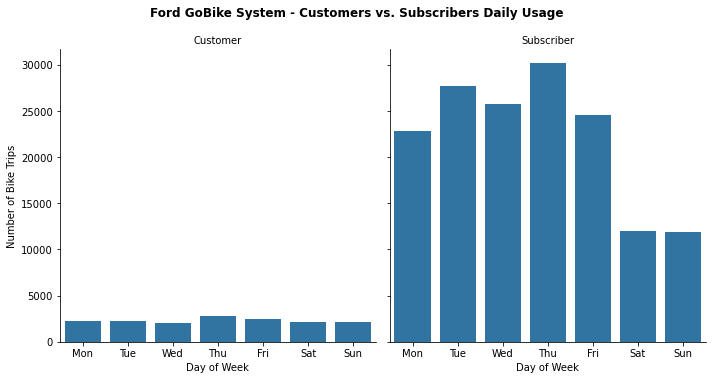

In [101]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph=sb.catplot(data = gobike_df_clean, x = 'start_dayofweek', col = 'user_type',kind='count',color=base_color,order = weekday);
graph.set_axis_labels("Day of Week", "Number of Bike Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Daily Usage', y=1.05, fontsize=12, fontweight='bold');


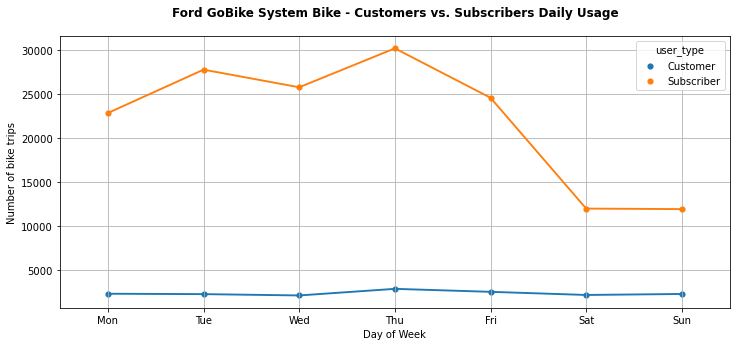

In [37]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = gobike_df_clean.groupby(['start_dayofweek', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.pointplot(data=df_cleaned_user_week, x='start_dayofweek', y=0, hue = 'user_type', scale=.7, order = weekday);
x_y_t('Day of Week',"Number of bike trips",'Ford GoBike System Bike - Customers vs. Subscribers Daily Usage')
plt.grid()

**Observation**\
Most bikers are subscribers i.e members who have monthly subscription hence the high number of bike trips in the week. Whereas, customers who pay per trip records low number of bike trips in a week.
Subscribers happen to use the bike share system during the weekday with a decline on the weekend.

### Subscriber and Customer usage by start time hour
**What time of the day are most trips taken by users?**

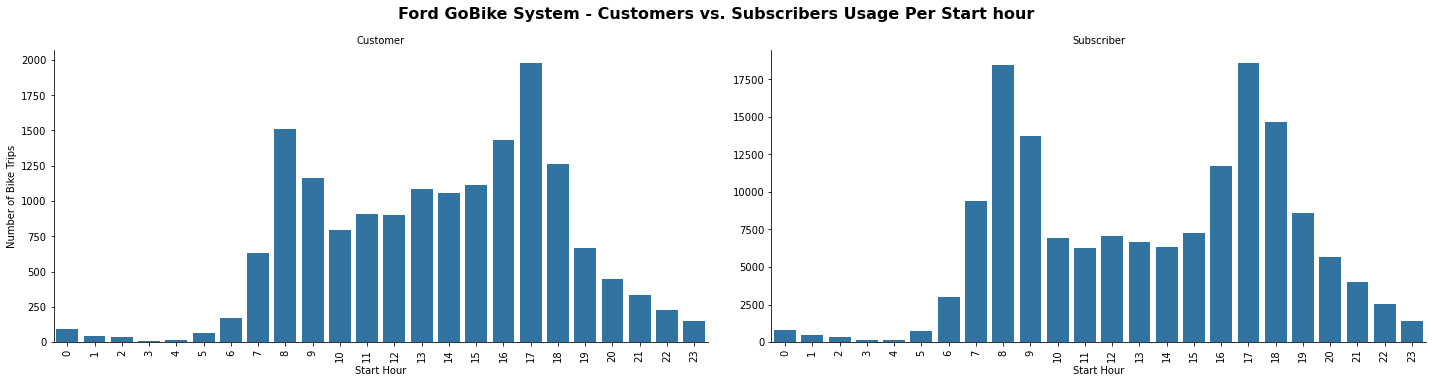

In [103]:
# Customer Usage by Weekday vs. Subscriber Usage by start time hour

graph = sb.catplot(data=gobike_df_clean, x = 'start_hour', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Start Hour', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Usage Per Start hour', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=90);

**Observation**\
Both subscribers and customers happen to use the share bike more 8 AM and 5 PM. Subscribers number of bike trips is bimodal at 8 AM and 5 PM, whereas customers number of bike trips is unimodal at 5 PM.

### Subscriber and Customer usage by duration
**How long does users take riding the Gobikes?

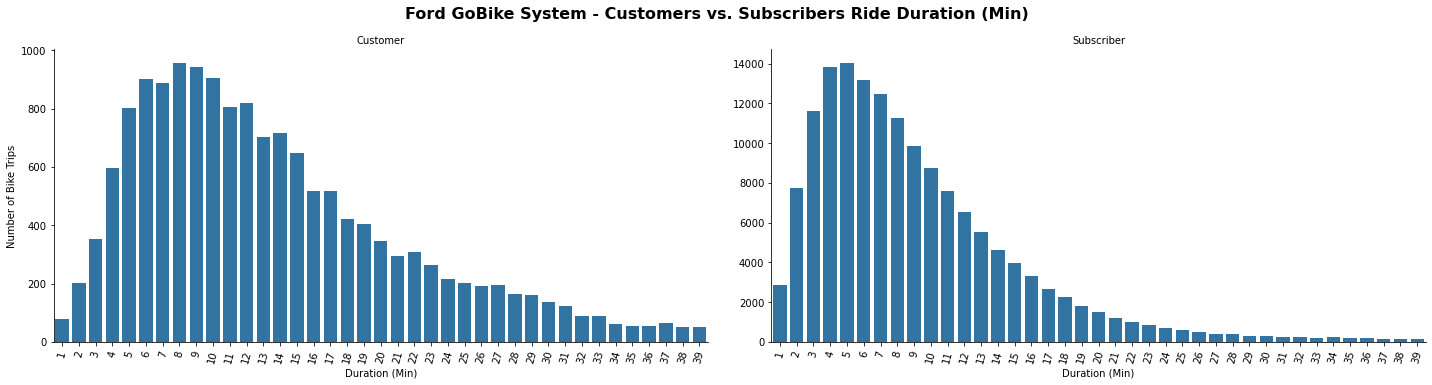

In [56]:
gobike_df_clean['duration_min_int'] = gobike_df_clean['duration_min'].astype(int)
data = gobike_df_clean.query('duration_min_int < 40')

graph = sb.catplot(data=data, x = 'duration_min_int', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

<AxesSubplot:xlabel='user_type', ylabel='duration_min'>

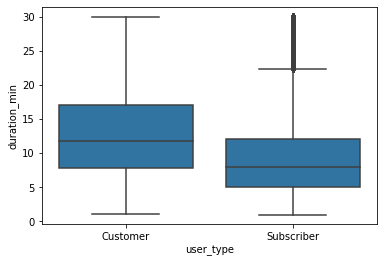

In [57]:
ndata = gobike_df_clean.query('duration_min < 30')
sb.boxplot(data=ndata, x='user_type', y='duration_min', color=base_color)

**Observation**\
From observation, subscribers duration of trip are usually between 4 and 11 minutes according to the box plot, whereas customers duration of trip are usually between 7 to 17 minutes according to the box plot. This can probably be explained by the fact that subscribers mainly use the Ford Gobikes to commute to work or school rather than longer trips or pleasure around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Finding the relationship between user type and other features of the dataset revealed different usage between subscribers and customers. According to the data customers are usually casual riders such as tourists etc. This is explained by the total number of bike trips and duration of trip by consumers as compared to that of subscribers.  Also, it appears that the bikes are normally rented at 8 AM and 5 PM that is before and after work or school.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration of trip is usually different between customers and subscribers with subscribers trips usually shorter than that of customers. This may be due to the fact subscribers use the share bike system mainly for commute to and from work or school whereas customers use the share bike system for longer trips around the surrounding area to tour or for pleasure.

## Multivariate Exploration

> In this section, three or more variables plots will be created to investigate the dataset even
further.

### Daily usage by user type and gender
**Which gender user takes more trips in a week?**

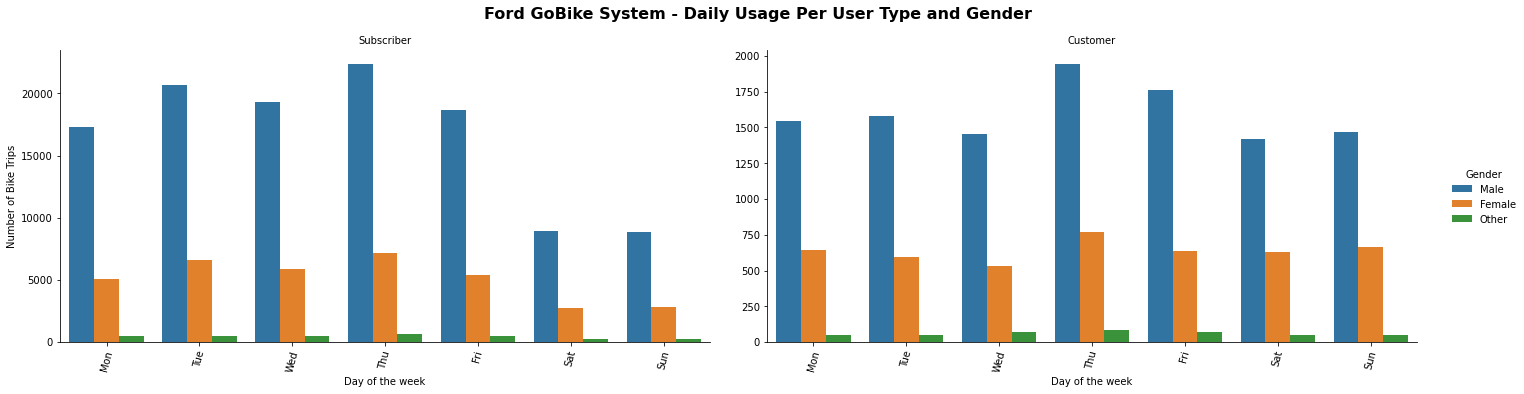

In [109]:
# Monthly usage - user type and gender
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=gobike_df_clean, x='start_dayofweek', col="user_type", hue="member_gender",order=weekday, kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Day of the week", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Daily Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### Number of bike trips by gender and user type Visualization
**Which gender user type takes more trips?**

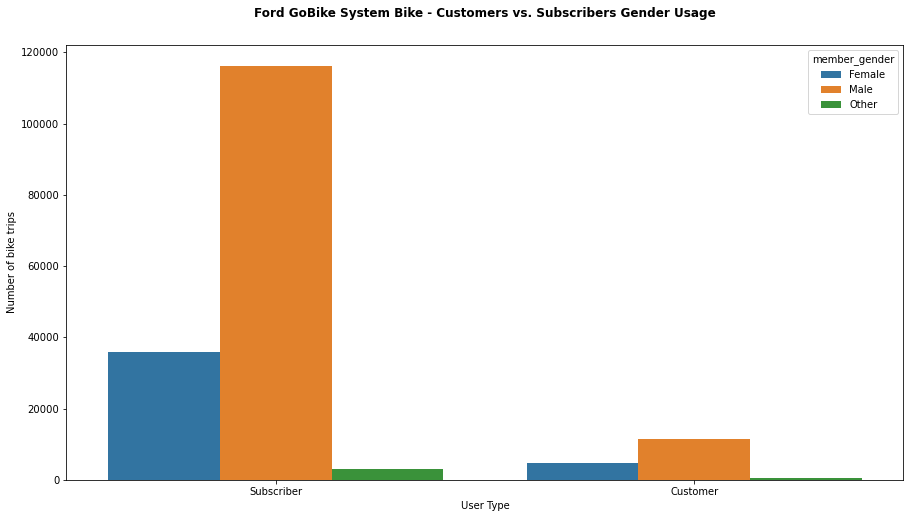

In [38]:

plt.figure(figsize = [15, 8])

# code for the bar chart

graph = sb.countplot(data=gobike_df_clean, x="user_type", hue="member_gender", order=gobike_df_clean.user_type.value_counts().index)
x_y_t('User Type',"Number of bike trips",'Ford GoBike System Bike - Customers vs. Subscribers Gender Usage')


**Observation**\
In general it appears that both male subscribers and customers take more bike trips than female and other genders. However, the ratio between male and female subscribers(approximatelly 3:1) is bigger than that of customers(approximately 2:1).

### Trip duration by gender and user type Visualization
**Which gender user type takes longer trips?**

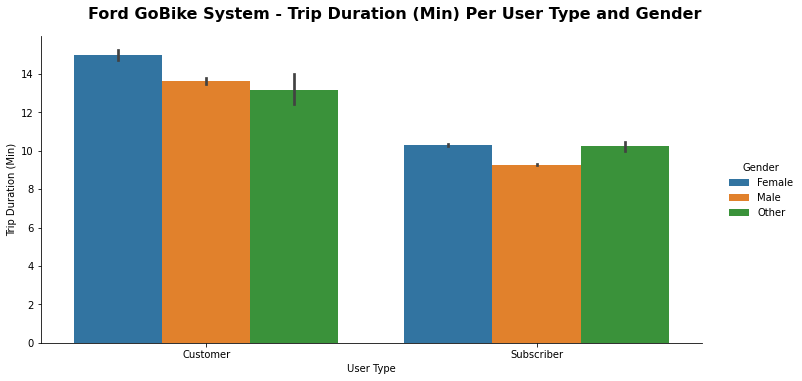

In [109]:
# Bar Chart- duration (min) per user type and gender

graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="bar", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');


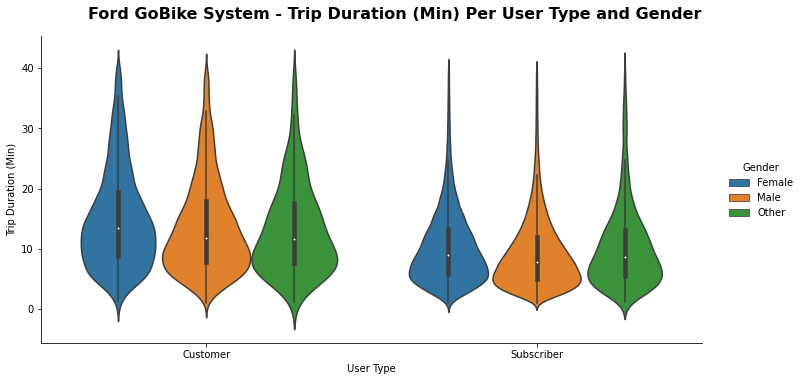

In [110]:
# Violinplot - duration (min) per user type and gender

graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

**Observation**\
From observation, both female customers and subscribers take longer trips than other genders even though male subscribers and customers take more trips.

### Number of bike trips by age group and user type Visualization
**Which age group user type takes more bike trips?**

In [25]:
gobike_df_clean.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [41]:
# Create Bin edges to "cut" the age data into groups('15-25','26-35','36-45','46-60')
bin_edges = [ 15 ,25 , 35, 45,60] 
bin_names=['15-25','26-35','36-45','46-60']
gobike_df_clean['member_age_group']=pd.cut(gobike_df_clean['member_age'],bin_edges,labels=bin_names)

In [42]:
gobike_df_clean['member_age_group'].value_counts()

26-35    83520
36-45    37202
15-25    30652
46-60    20243
Name: member_age_group, dtype: int64

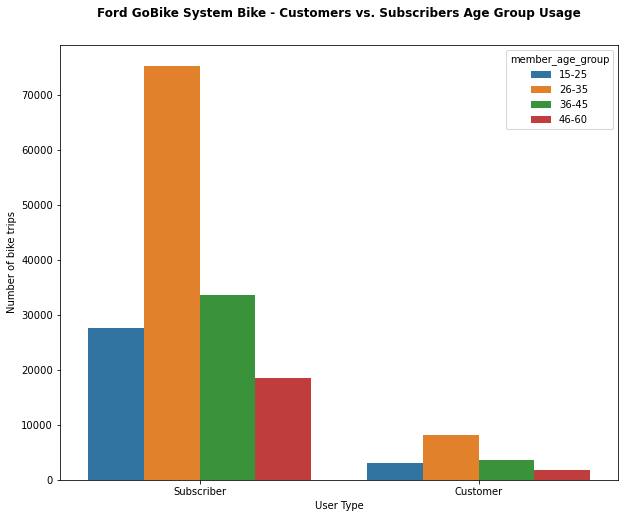

In [43]:
plt.figure(figsize = [10, 8])
g = sb.countplot(data=gobike_df_clean, x="user_type", hue="member_age_group", order=gobike_df_clean.user_type.value_counts().index)
x_y_t('User Type',"Number of bike trips",'Ford GoBike System Bike - Customers vs. Subscribers Age Group Usage')


**Observation**\
In general, subscribers between the ages of 26 and 35 takes more bike trips that other age groups.

### Trip duration by age group and user type Visualization
**Which age group user type takes longer trips?**

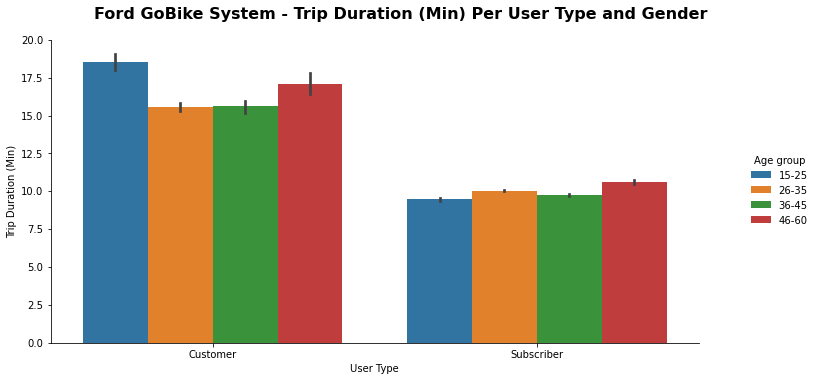

In [66]:

graph = sb.catplot(data=gobike_df_clean, x='user_type', y="duration_min", hue="member_age_group", kind="bar", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Age group')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

**Observation**\
Even though subscribers between the ages of 26 and 35 takes more bike trips, customers between the ages of 15 and 25 takes longer trips than other age groups. This can be explained by the fact that customers between the ages of 15-25 use the bike share for tourism and pleasure, whereas subscribers between the ages of 26 and 35 strictly use the bike share to commute to work/school. Also customers between the ages of 46 and 60 happens to take longer trips given that the fact that they record the lower number of bike trip.

### Daily bike usage by age group and user type Visualization

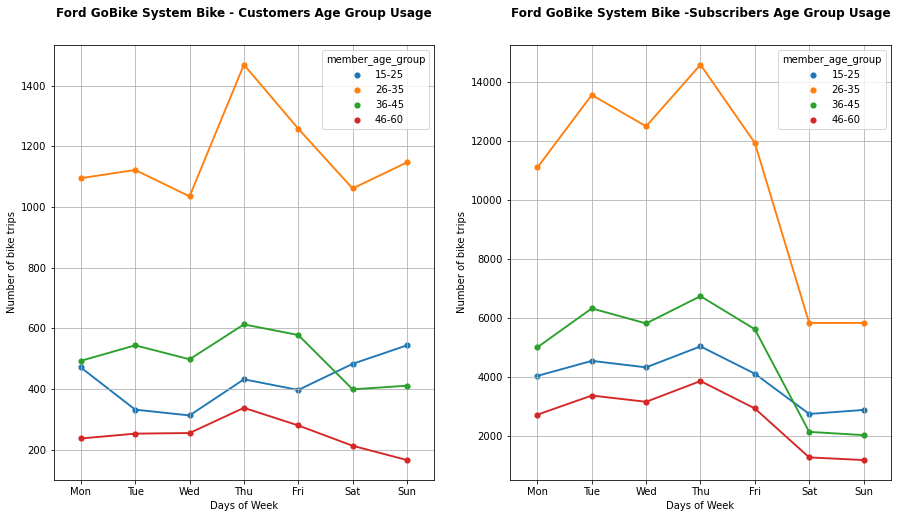

In [46]:
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)
df_cleaned_cus_user_week = gobike_df_clean[gobike_df_clean['user_type'] == 'Customer'].groupby(['start_dayofweek', 'member_age_group']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_cus_user_week, x='start_dayofweek', y=0, hue = 'member_age_group', scale=.7, order = weekday);
x_y_t('Days of Week',"Number of bike trips",'Ford GoBike System Bike - Customers Age Group Usage')
plt.grid()

plt.subplot(1, 2, 2)
df_cleaned_sub_user_week = gobike_df_clean[gobike_df_clean['user_type'] == 'Subscriber'].groupby(['start_dayofweek', 'member_age_group']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_sub_user_week, x='start_dayofweek', y=0, hue = 'member_age_group', scale=.7, order = weekday);
x_y_t('Days of Week',"Number of bike trips",'Ford GoBike System Bike -Subscribers Age Group Usage')
#plt.title('Ford GoBike System Daily Usage Per User Type and Age Group', y=1.05, fontsize=16, fontweight='bold')
plt.grid()

**Observation**\
Generally, subscribers and customers who fall within the age group of 26-35 years old are most likely to use the Gobike sharing system. Bikers between the ages of 36-45 year which follows a similar trend to that of 26-35 year olds age group are the next most likely to use the Gobike sharing system. The youngest age group (15-25 years) olds starts off with very few rides below age group (36-45 years) old, but increases over the weekend (Sat and Sun) above the age group (36-45 years) old. In general, customers of all age group (except 46-60) turn to user the Gobike system more over the weekend which is explained by the increase in number of bike trips from Saturday to Sunday. However, we see a huge decline in the number of trips from Thursday to Sunday for subscribers of all age group except for the youngest age group(15-25 years) which slightly increased on Sunday.
This can be explain by the fact that, subscribers who normally use the share bike system to commute to work/school prefer to stay at home and rest rather than out for pleasure or tourism as the youngest age group would.

### Trip Duration by user type and days of the week Visualization
**Which user type takes longer trips during the week?**

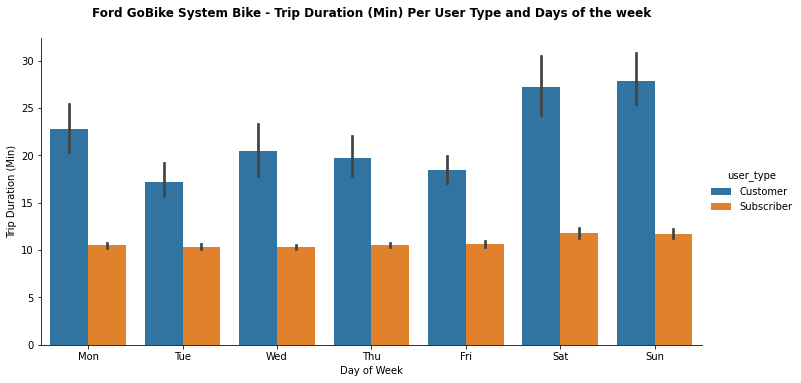

In [47]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=gobike_df_clean, x='start_dayofweek', y="duration_min", hue="user_type", kind="bar",order=weekday, height=5, aspect=2);
x_y_t('Day of Week',"Trip Duration (Min)",'Ford GoBike System Bike - Trip Duration (Min) Per User Type and Days of the week')


**Observation**\
Customers generally take long trips than subscribers. Customers happen to speed more time riding the Gobikes on weekends more than the weekday.

Save dataframe to file

In [ ]:
gobike_df_clean.to_csv('gobike_master.csv', index= False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Exploring the data through different visuals and adding more variables to compare to other variables helped establish some relationships between some of the features. Subscriber and Customer gender per duration was explored using a violin point and bar plot.In addition to that, subscriber and customer age was expanded using member age groups. A pointplot was then used to demonstrate the daily bike usage by each age group. 

### Were there any interesting or surprising interactions between features?

> It was interesting to find out that, even though male generally takes bike trips that female and other gender, the females rides the bikes longer that male. Customers between the ages of 15 and 25 takes longer trips than other age groups, even though customers between the ages of 26 and 35 takes more bike trips.

## Conclusions
>>The dataset uses data collected in different location in the San Francisco Bay area of California in the month February 2019. The dataset contains approximately 183400 bike riders infomation.
74.6% of all bike rides were male, and 23% were females. Out of these bikers, about 89% are subscribers and 10% are casual customers. It appears that people generally use the bike service on weekdays more than weekends with 8am and 5pm recording peak hours for most bike trips.  subscribers and customers who fall within the age group of 26-35 years old use the Gobike sharing system more than other age group. 
In conclusion, renting a bike from the Ford GoBike System is a fantastic, affordable, convenient, healthy and environmentally friendly way of moving around in the Bay area's for work, school and pleasure. Subscribers and Customers are the two types of users or clients who rent these bikes. Subscribers are primarily use the bikes on a daily basis to commute i.e taking short trips to and from work and rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

